In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## Printing the number of available GPU's to train on
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
## If training using google colab. Otherwise using pandas
from google.colab import drive
drive.mount('/content/drive')
file = "/content/drive/MyDrive/Colab_Notebooks/tom_and_jerry"

Mounted at /content/drive


In [ ]:
## If training from a computer
file = "Assignment-6\tom_and_jerry"

In [44]:
batch_size = 32 # arbitrary
num_classes = 2 # class_1 = tom, class_2 = jerry
epochs = 20 # how many passes forward and backwards

imageSize = (1280, 720)

train, test  = tf.keras.preprocessing.image_dataset_from_directory(
    file,
    validation_split=.2,
    subset="both",
    seed=1234,
    image_size=imageSize,
    label_mode="binary",
    color_mode="rgb",
    batch_size=32
)

Found 3170 files belonging to 2 classes.
Using 2536 files for training.
Using 634 files for validation.


In [ ]:
## Prints the first image batch
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 50, 3)
(32, 1)


In [ ]:
## Prints the class names that will be used for training
class_names = train.class_names
print(class_names)

['jerry', 'tom']


##CNN Model

####Creating Model

In [ ]:
## Prints the number of classes 
num_classes = len(class_names)

## Makes a sequential model using the keras api for a CNN architechure. Has several layers that ends in a softmax for binary classification
model = Sequential([
  tf.keras.Input(shape=(100, 50, 3)),
  layers.Conv2D(100, (3, 3), activation = "relu"),
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Conv2D(100, (3, 3), activation = 'relu'),
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(2, activation = "softmax")
])

####Showing Summary

In [ ]:
## The summary of a model
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 98, 48, 100)       2800      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 49, 24, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 47, 22, 100)       90100     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 23, 11, 100)      0         
 g2D)                                                            
                                                                 
 flatten_39 (Flatten)        (None, 25300)             0         
                                                                 
 dropout_23 (Dropout)        (None, 25300)           

####Compiling Model

In [ ]:
## Compiles the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

####Fitting Model

In [ ]:
## Fits the model
epochs=10
history = model.fit(
  train,  
  validation_data=test,
  epochs=epochs,
  batch_size = batch_size,
  verbose = 1
)

Epoch 1/10
80/80 [==============================] - 78s 933ms/step - loss: 7.2992 - accuracy: 0.6116 - val_loss: 0.6218 - val_accuracy: 0.6909
Epoch 2/10
80/80 [==============================] - 76s 935ms/step - loss: 0.6295 - accuracy: 0.6589 - val_loss: 0.5353 - val_accuracy: 0.7334
Epoch 3/10
80/80 [==============================] - 76s 936ms/step - loss: 0.5799 - accuracy: 0.6838 - val_loss: 0.5184 - val_accuracy: 0.7035
Epoch 4/10
80/80 [==============================] - 75s 928ms/step - loss: 0.5538 - accuracy: 0.7118 - val_loss: 0.5426 - val_accuracy: 0.7334
Epoch 5/10
80/80 [==============================] - 77s 947ms/step - loss: 0.5373 - accuracy: 0.7244 - val_loss: 0.4461 - val_accuracy: 0.7808
Epoch 6/10
80/80 [==============================] - 75s 934ms/step - loss: 0.5255 - accuracy: 0.7441 - val_loss: 0.4678 - val_accuracy: 0.7571
Epoch 7/10
80/80 [==============================] - 75s 933ms/step - loss: 0.5129 - accuracy: 0.7342 - val_loss: 0.4636 - val_accuracy: 0.7524

####Plotting Accuracy to Epoch

In [ ]:
## Makes a plot with the accuracy of the model
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

##Sequential Model

####Creating Model

In [ ]:
num_classes = len(class_names)

## Repeats the model creation but without the convalution level for a plain sequential model
model = Sequential([
  layers.Flatten(input_shape = (1280, 720, 3)),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(512, activation = 'relu'),
  layers.Dropout(0.2),
  layers.Dense(2, activation = 'softmax')
])

####Showing Summary

In [ ]:
## Prints the summary
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 15000)             0         
                                                                 
 dense_32 (Dense)            (None, 512)               7680512   
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 512)               262656    
                                                                 
 dropout_25 (Dropout)        (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 7,944,194
Trainable params: 7,944,194
N

####Compiling Model

In [ ]:
## Compiles the sequantial model
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

####Fitting Model

In [ ]:
## Fits the model to the data
epochs=10
history = model.fit(
  train,  
  validation_data=test,
  epochs=epochs,
  batch_size = batch_size,
  verbose = 1
)

Epoch 1/10
80/80 [==============================] - 22s 253ms/step - loss: 470.4150 - accuracy: 0.5619 - val_loss: 0.6768 - val_accuracy: 0.6341
Epoch 2/10
80/80 [==============================] - 21s 252ms/step - loss: 4.6660 - accuracy: 0.5946 - val_loss: 0.6690 - val_accuracy: 0.6246
Epoch 3/10
80/80 [==============================] - 18s 219ms/step - loss: 1.9882 - accuracy: 0.6029 - val_loss: 0.6638 - val_accuracy: 0.6262
Epoch 4/10
80/80 [==============================] - 18s 221ms/step - loss: 0.6898 - accuracy: 0.6041 - val_loss: 0.6643 - val_accuracy: 0.6262
Epoch 5/10
80/80 [==============================] - 21s 244ms/step - loss: 0.6717 - accuracy: 0.6045 - val_loss: 0.6642 - val_accuracy: 0.6262
Epoch 6/10
80/80 [==============================] - 19s 231ms/step - loss: 0.6715 - accuracy: 0.6045 - val_loss: 0.6654 - val_accuracy: 0.6262
Epoch 7/10
80/80 [==============================] - 21s 253ms/step - loss: 0.6716 - accuracy: 0.6045 - val_loss: 0.6652 - val_accuracy: 0.62

####Plotting Accuracy to Epoch

<function matplotlib.pyplot.show(close=None, block=None)>

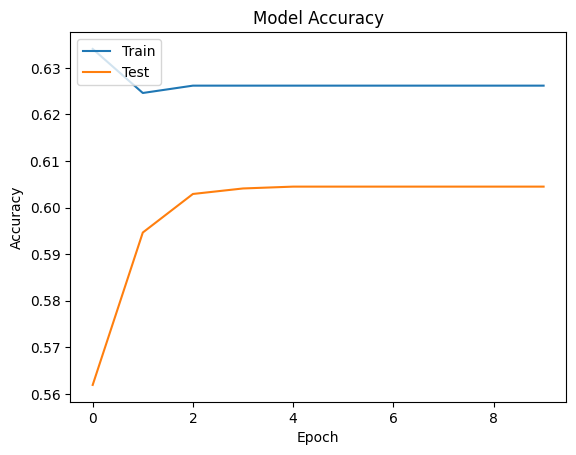

In [ ]:
#Plots the accuarcy
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

##Using Pretrained Model
by following the provided tutorial: https://www.tensorflow.org/tutorials/images/transfer_learning

####Downloading Data

In [45]:
## Gets all of the data fom a given url and save it as a file
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

Found 2000 files belonging to 2 classes.


####Creating Train Subset

In [46]:
#Loads the data to memory
train = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                    shuffle=True,
                                                    batch_size=32,
                                                    image_size=imageSize
                                                  )

Found 2000 files belonging to 2 classes.


####Creating Test Subset

In [7]:
#Loads a seperate directory as the validation data set
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


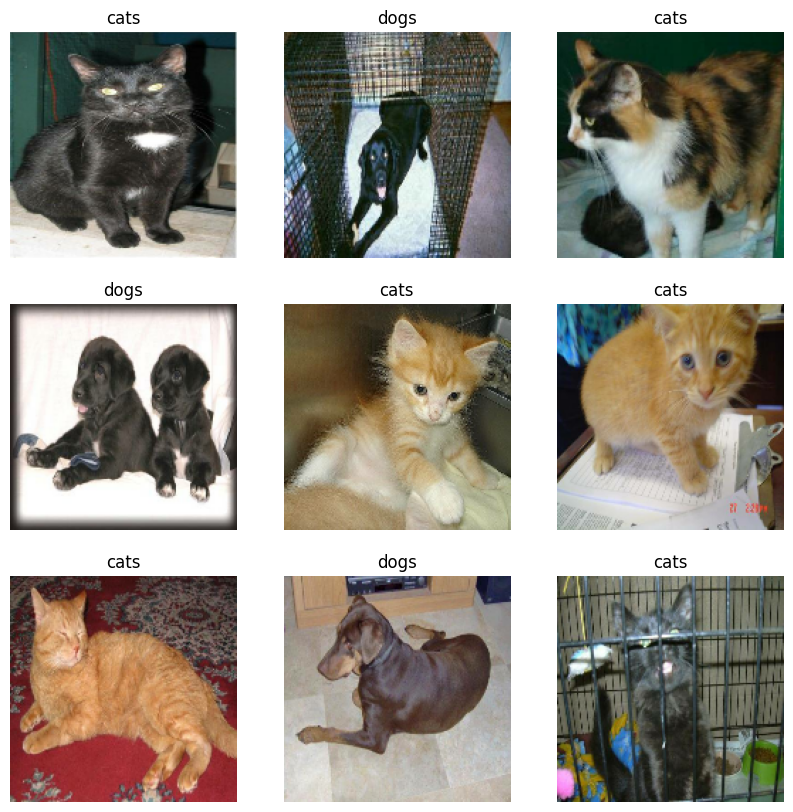

In [8]:
## Gtes all of the class names
class_names = train_dataset.class_names

## Prints pictures with all of the various classes
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
## Splits the validation dataset and the test set into their batches for training efficency
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 21
Number of test batches: 5


In [11]:
## Will prefetch the data
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [12]:
## Augements the data by spinning the images to a certain extend
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

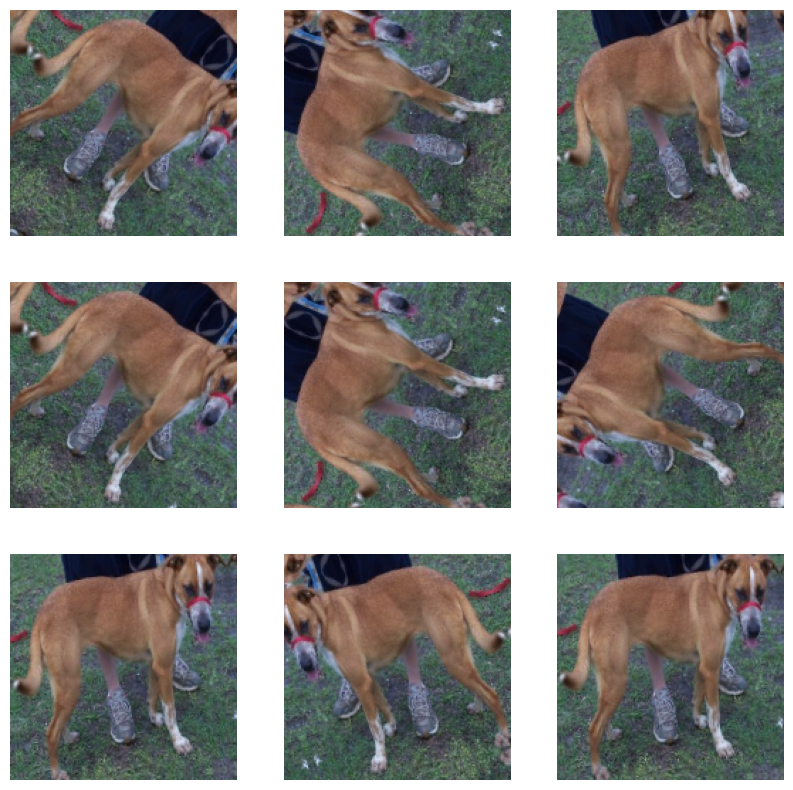

In [13]:
## Prints an augemented picture
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [14]:
## Makes a preprocessing unit that can be used to scale the images
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [15]:
## Rescales the images to be 1/127th the size they were originally
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [16]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (5, 5) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [17]:
## Shows that batches are 32 images in a 5 by 5 
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [19]:

base_model.trainable = False
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [20]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape) ## Prints the batch sizes

(32, 1280)


In [21]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [22]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [23]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [25]:
len(model.trainable_variables)

2

In [26]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

21/21 [==============================] - 11s 385ms/step - loss: 0.8328 - accuracy: 0.4691


In [27]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.83
initial accuracy: 0.47


In [28]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 49s 725ms/step - loss: 0.7501 - accuracy: 0.5470 - val_loss: 0.5908 - val_accuracy: 0.6512
Epoch 2/10
63/63 [==============================] - 52s 825ms/step - loss: 0.5776 - accuracy: 0.6705 - val_loss: 0.4188 - val_accuracy: 0.7654
Epoch 3/10
63/63 [==============================] - 40s 629ms/step - loss: 0.4619 - accuracy: 0.7605 - val_loss: 0.3284 - val_accuracy: 0.8179
Epoch 4/10
63/63 [==============================] - 42s 667ms/step - loss: 0.3848 - accuracy: 0.8105 - val_loss: 0.2595 - val_accuracy: 0.8781
Epoch 5/10
63/63 [==============================] - 40s 639ms/step - loss: 0.3372 - accuracy: 0.8430 - val_loss: 0.2259 - val_accuracy: 0.9043
Epoch 6/10
63/63 [==============================] - 41s 658ms/step - loss: 0.3038 - accuracy: 0.8660 - val_loss: 0.1957 - val_accuracy: 0.9151
Epoch 7/10
63/63 [==============================] - 39s 621ms/step - loss: 0.2804 - accuracy: 0.8695 - val_loss: 0.1797 - val_accuracy: 0.9259

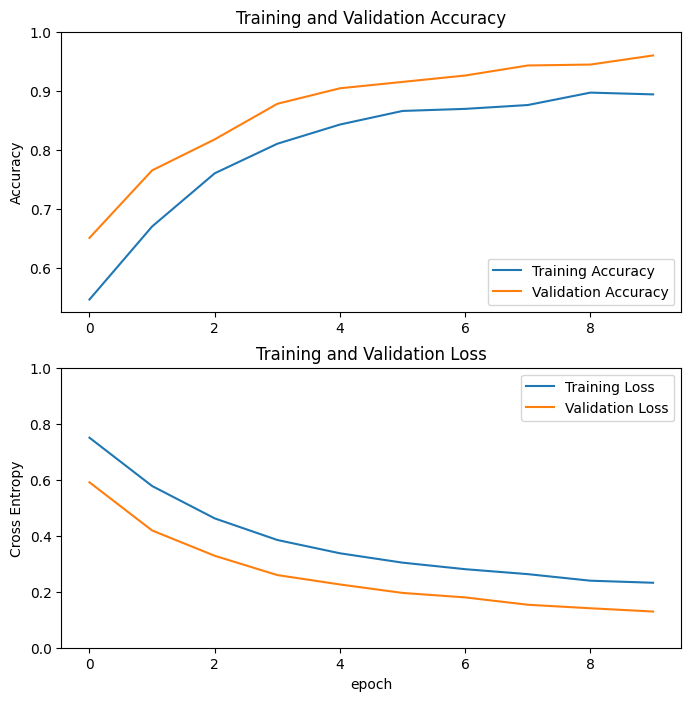

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [30]:
base_model.trainable = True

In [31]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [32]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [34]:
len(model.trainable_variables)

56

In [35]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
63/63 [==============================] - 66s 987ms/step - loss: 0.1744 - accuracy: 0.9250 - val_loss: 0.0450 - val_accuracy: 0.9923
Epoch 11/20
63/63 [==============================] - 66s 1s/step - loss: 0.1389 - accuracy: 0.9435 - val_loss: 0.0603 - val_accuracy: 0.9722
Epoch 12/20
63/63 [==============================] - 59s 936ms/step - loss: 0.0991 - accuracy: 0.9560 - val_loss: 0.0445 - val_accuracy: 0.9815
Epoch 13/20
63/63 [==============================] - 61s 972ms/step - loss: 0.1019 - accuracy: 0.9600 - val_loss: 0.0381 - val_accuracy: 0.9907
Epoch 14/20
63/63 [==============================] - 61s 969ms/step - loss: 0.0879 - accuracy: 0.9640 - val_loss: 0.0332 - val_accuracy: 0.9877
Epoch 15/20
63/63 [==============================] - 61s 962ms/step - loss: 0.0744 - accuracy: 0.9705 - val_loss: 0.0354 - val_accuracy: 0.9877
Epoch 16/20
63/63 [==============================] - 61s 967ms/step - loss: 0.0768 - accuracy: 0.9705 - val_loss: 0.0367 - val_accuracy: 0.

In [36]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

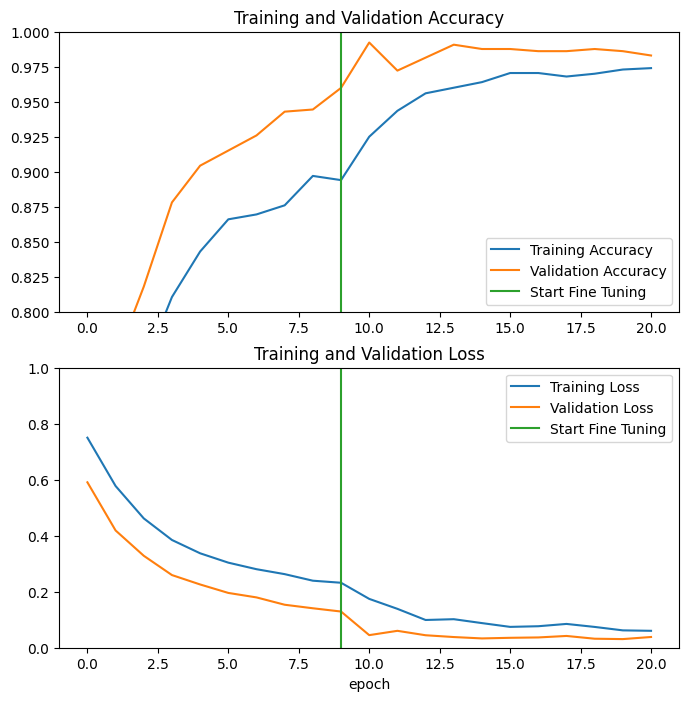

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [38]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

5/5 [==============================] - 3s 402ms/step - loss: 0.0608 - accuracy: 0.9750
Test accuracy : 0.9750000238418579


Predictions:
 [1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1]
Labels:
 [1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1]


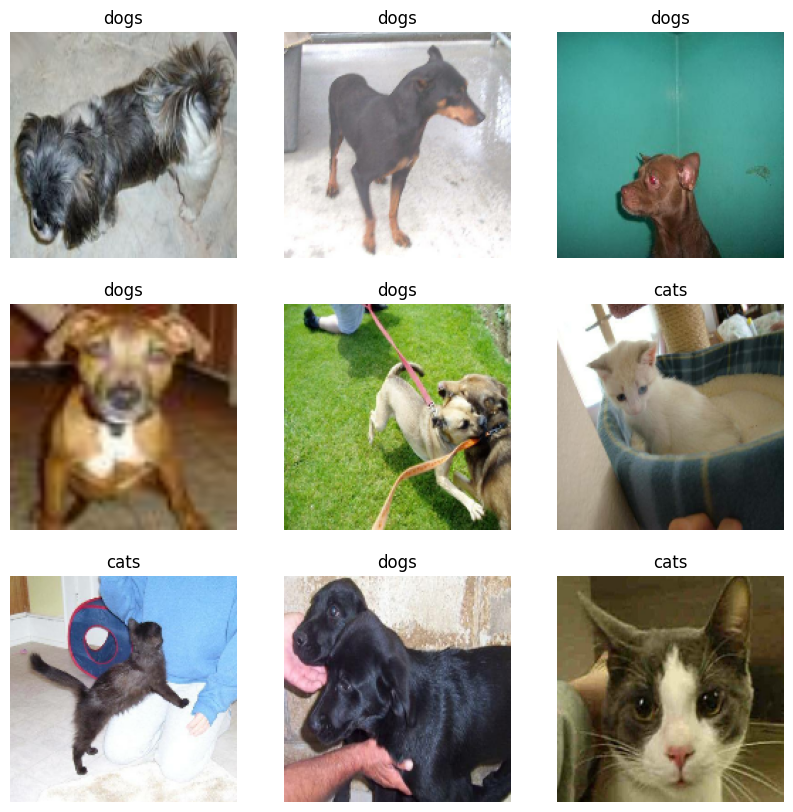

In [39]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")